In [1]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
DEMO_FILE = './data/035_PESI_nEpE_QC4_R2_Seg2Ev1.JDX'

In [3]:
with open(DEMO_FILE) as fp:
    scan_list = []
    time_list = []
    tic_list = []
    x_list, y_list = [],[]
    for cnt, line in enumerate(fp):
        if line.startswith('##SCAN_NUMBER= '):
            scan = int(line.strip().split('##SCAN_NUMBER= ')[1])
            #print("SCAN: ", scan)
        if line.startswith('##RETENTION_TIME= '):
            time = float(line.strip().split('##RETENTION_TIME= ')[1])
            #print("TIME: ", time)
        if line.startswith('##TIC= '):
            tic = int(line.strip().split('##TIC= ')[1])
            #print("TIC: ", tic)
        if line[0].isdigit():
            x,y = line.strip().split(',')
            x = float(x)
            y = int(y)
            scan_list.append(scan)
            time_list.append(time)
            tic_list.append(tic)
            x_list.append(x)
            y_list.append(y)

            
    measurements = pd.DataFrame({'scan': scan_list,
                                 'time': time_list,
                                 'tic': tic_list,
                                 'x': x_list,
                                 'y': y_list})

In [4]:
measurements

,scan,time,tic,x,y
0,8,3.6,863529,10.90,102
1,8,3.6,863529,11.73,856
2,8,3.6,863529,13.10,79
3,8,3.6,863529,14.57,445
4,8,3.6,863529,15.40,129
...,...,...,...,...,...
118755,67,33.1,45041081,1994.90,433
118756,67,33.1,45041081,1995.30,92
118757,67,33.1,45041081,1996.30,88
118758,67,33.1,45041081,1997.40,315


In [5]:
measurements.dtypes

scan      int64
time    float64
tic       int64
x       float64
y         int64
dtype: object

## Print TIC graph

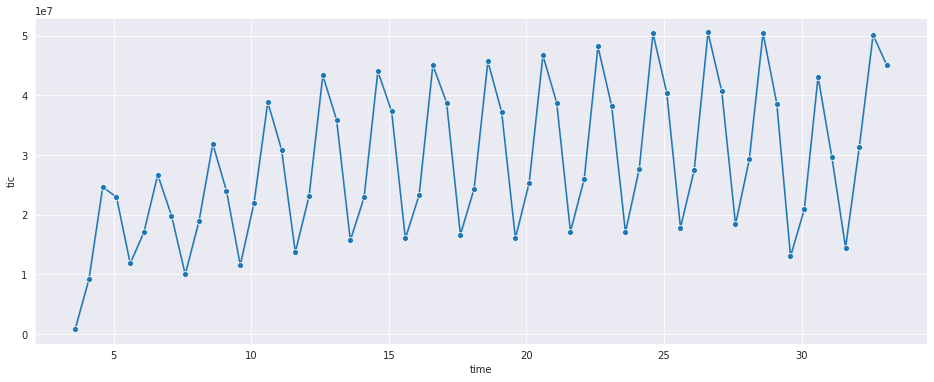

In [6]:
plt.figure(figsize=(16, 6))
sns.lineplot(data=measurements, x="time", y="tic", markers=True, style=time, legend=False)
plt.show()

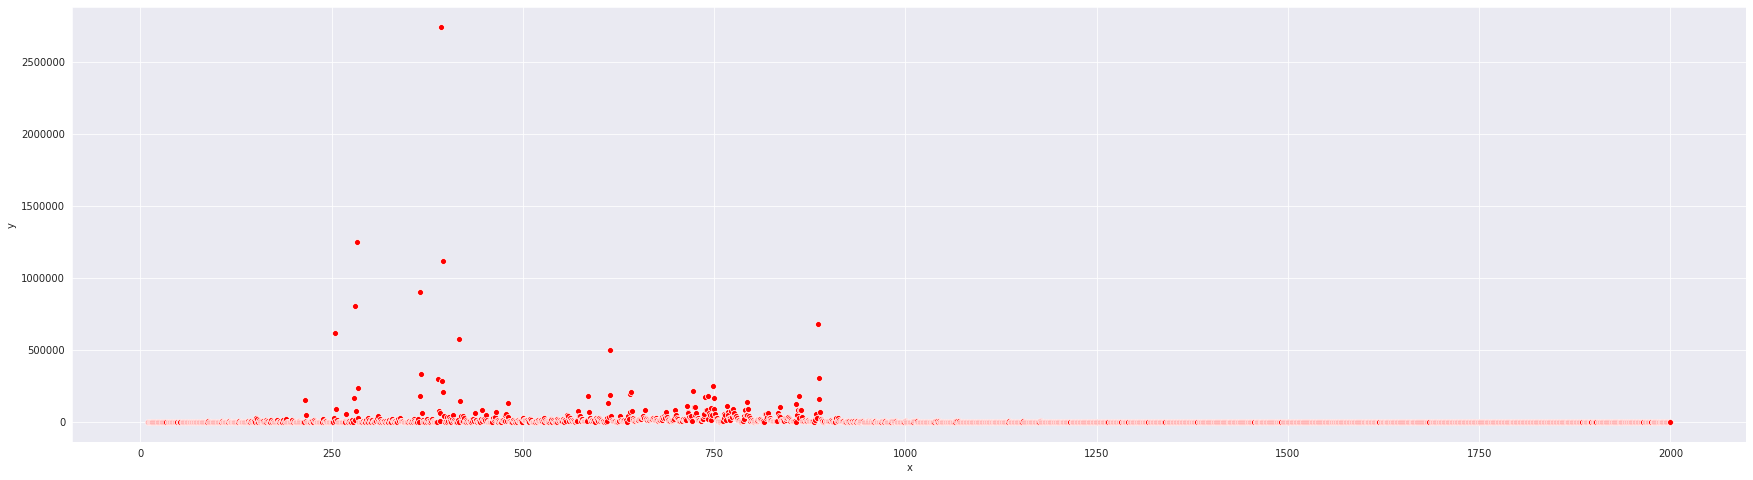

In [7]:
plt.figure(figsize=(30, 8))
sns.scatterplot(data=measurements[measurements.time == 6.6], x="x", y="y", color='Red')
plt.show()

<Figure size 2160x576 with 0 Axes>

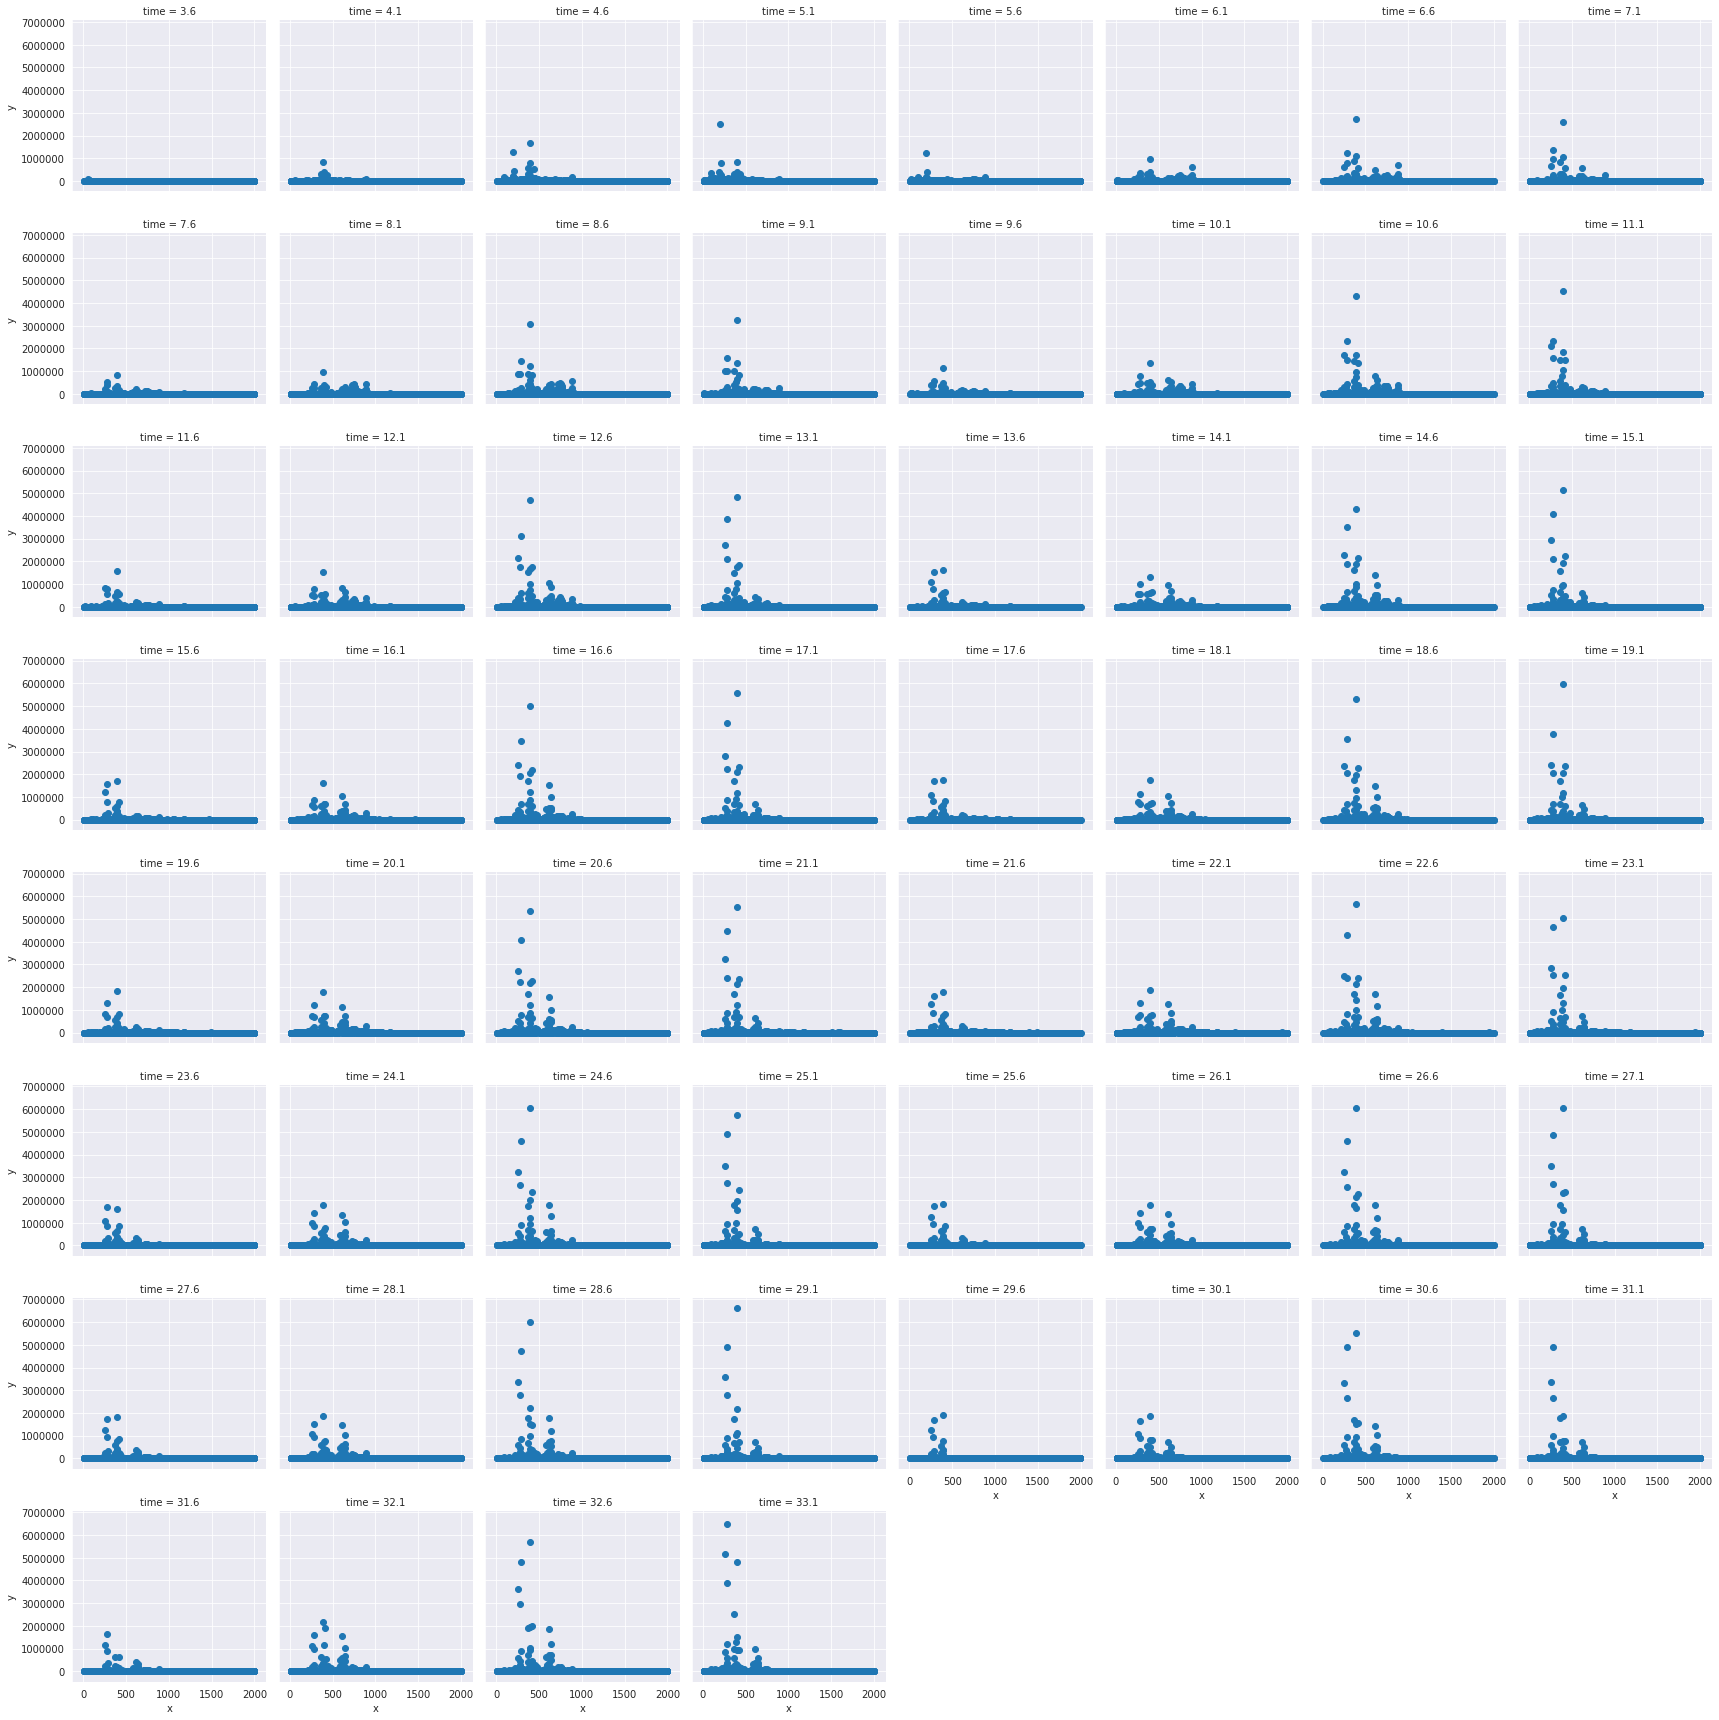

In [8]:
plt.figure(figsize=(30, 8))
g = sns.FacetGrid(measurements, col = "time", col_wrap=8)
g.map(plt.scatter, "x", "y")